Vom folosi setul de date de la: https://www.kaggle.com/datasets/vishesh1412/celebrity-face-image-dataset

In [1]:
!pip install onnxruntime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 47.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 3.3 MB/s eta 0:00:00


In [2]:
!pip install insightface

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.5/439.5 kB 7.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 82.1 MB/s eta 0:00:00
  Created wheel for insightface: filename=insightface-0.7.3-cp311-cp311-linux_x86_64.whl size=1064779 sha256=122d03f4f1751b7189c9b0bdaf0fba6743d29573c2b0f3ff108e572a71922e74
  Stored in directory: /root/.cache/pip/wheels/27/d8/22/f52d858d16cd06e7b2e6aad34a1777dcfaf000be833bbf8146
Successfully built insightface


In [3]:
import google.colab
google.colab.drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [38]:
import zipfile
import os
from google.colab import files
from IPython.display import display
from google.colab.patches import cv2_imshow
import numpy as np
import insightface
from insightface.app import FaceAnalysis
import cv2
from insightface.utils import face_align
from tqdm import tqdm
from sklearn.manifold import TSNE
import umap
import pickle
import matplotlib.pyplot as plt

In [12]:
data_dir = '/content/gdrive/MyDrive/Facultate Informatica/Profesor/2024 - 2025/Biometrie/Curs/ColabMount/DATA/Celebrity_Faces_Dataset'
model_dir = '/content/gdrive/MyDrive/Facultate Informatica/Profesor/2024 - 2025/Biometrie/Curs/ColabMount/Models/Face/FacesDatabase'

In [13]:
if os.path.isdir(data_dir):
  print("Data directory exists")
else:
  print("Data directory does not exist")
if os.path.isdir(model_dir):
  print("Model directory exists")
else:
  print("Model directory does not exist")

Data directory exists
Model directory exists


In [10]:
model = insightface.app.FaceAnalysis(name='buffalo_l', providers=['CPUExecutionProvider'])
model.prepare(ctx_id=0)

download_path: /root/.insightface/models/buffalo_l


100%|██████████| 281857/281857 [00:03<00:00, 84890.01KB/s]


Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/w600k_r50.onnx recognition ['None', 3, 112, 112] 127.5 127.5
set det-size: (640, 640)


In [29]:
embeddings_dict = {}

for subdir in os.listdir(data_dir):
    subdir_path = os.path.join(data_dir, subdir)
    if os.path.isdir(subdir_path):
        embeddings_dict[subdir] = []
#        files = sorted(os.listdir(subdir_path))[:10]  # Limit to 10 files, sorted for consistency
        files = sorted(os.listdir(subdir_path))  # Limit to 10 files, sorted for consistency
        for file in tqdm(files, desc=f'Processing {subdir}'):
            img_path = os.path.join(subdir_path, file)
            img = cv2.imread(img_path)
            if img is None:
                continue
            faces = model.get(img)
            if len(faces) == 0:
                continue
            embedding = faces[0].embedding
            embeddings_dict[subdir].append(embedding)

Processing Will Smith: 100%|██████████| 100/100 [01:49<00:00,  1.10s/it]


In [33]:
# Flatten the dictionary to get all embeddings and their labels
all_embeddings = []
labels = []

for label, vectors in embeddings_dict.items():
    for vec in vectors:
        all_embeddings.append(vec)
        labels.append(label)

all_embeddings = np.array(all_embeddings)


In [34]:
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
tsne_result = tsne.fit_transform(all_embeddings)


In [31]:
custom_colors = [
    'black',         # black
    'dimgray',       # dark gray
    'lightgray',     # light gray
    'red',
    'blue',
    'green',
    'orange',
    'purple',
    'brown',
    'cyan',
    'magenta',
    'yellow',
    'pink',
    'lime',
    'teal',
    'gold',
    'navy'
]

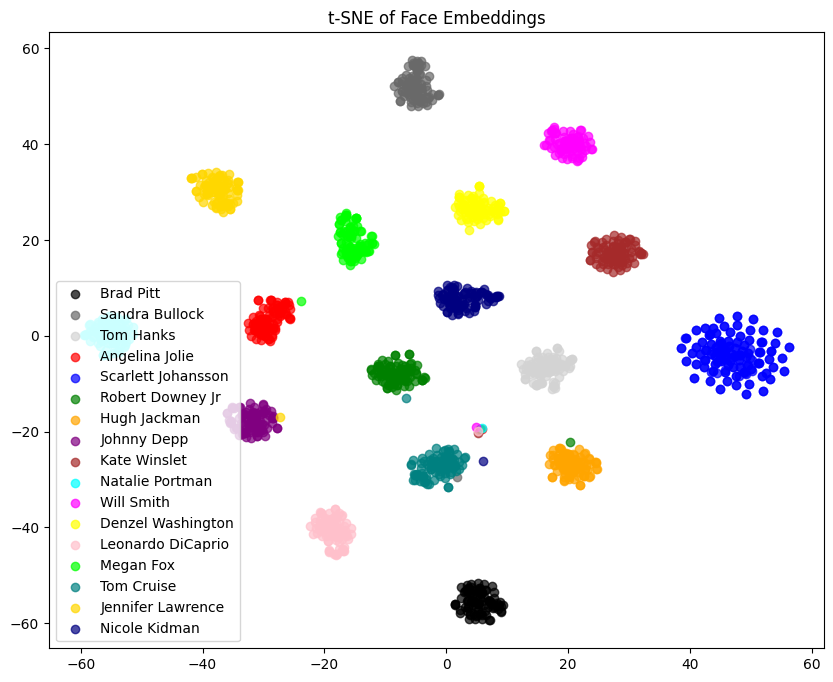

In [35]:
colors = custom_colors
plt.figure(figsize=(10, 8))
unique_labels = list(set(labels))
#colors = plt.cm.get_cmap('tab10', len(unique_labels))

for idx, label in enumerate(unique_labels):
    points = tsne_result[np.array(labels) == label]
    plt.scatter(points[:, 0], points[:, 1], label=label, alpha=0.7, color=colors[idx % len(colors)])

plt.title("t-SNE of Face Embeddings")
plt.legend()
plt.show()

In [36]:
umap_model = umap.UMAP(n_components=2, random_state=42)
umap_result = umap_model.fit_transform(all_embeddings)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


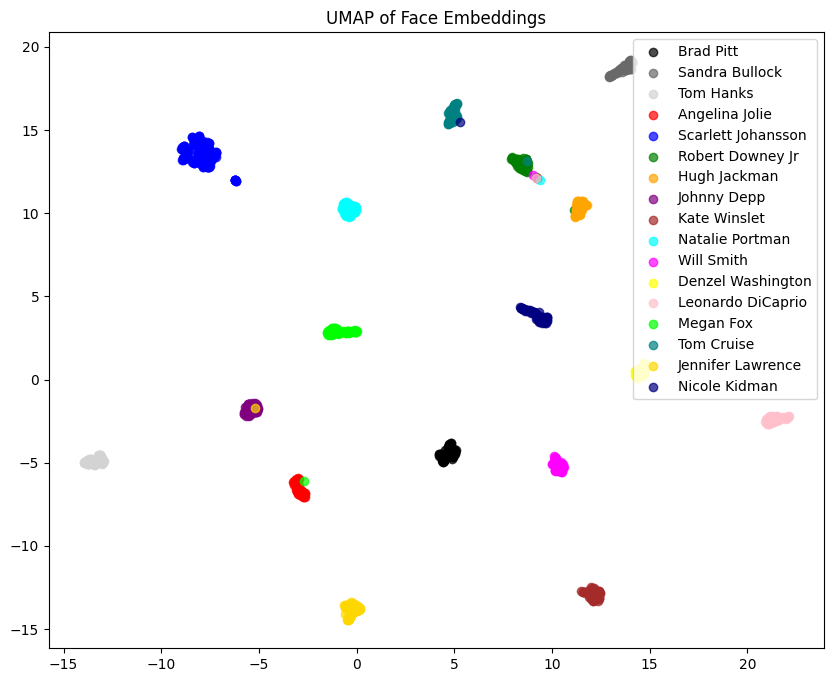

In [37]:
colors = custom_colors
plt.figure(figsize=(10, 8))
unique_labels = list(set(labels))
#colors = plt.cm.get_cmap('tab10', len(unique_labels))

for idx, label in enumerate(unique_labels):
    points = umap_result[np.array(labels) == label]
    plt.scatter(points[:, 0], points[:, 1], label=label, alpha=0.7, color=colors[idx % len(colors)])

plt.title("UMAP of Face Embeddings")
plt.legend()
plt.show()

In [42]:
model_name=os.path.join(model_dir, 'celebrity_faces.pkl')
with open(model_name, 'wb') as f:
    pickle.dump(embeddings_dict, f)